<a href="https://colab.research.google.com/github/Huzaifa3242/Machine-learning-projects/blob/main/Sms_spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np

In [59]:
df=pd.read_csv("spam.csv",encoding="latin-1")

In [60]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [61]:
df.shape

(5572, 5)

In [62]:
# Data cleaning
df.describe().transpose()

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [64]:
# dropping the cols which are not useful
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True,axis=1)

In [65]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [66]:
# Renaming the cols
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [67]:
df.head(3)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [68]:
# imputing the value in target col
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [69]:
df["target"]=le.fit_transform(df["target"])

In [70]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [71]:
# checking the null and duplicated values
df.isnull().sum()

,0
target,0
text,0


In [72]:
df.duplicated().sum()

np.int64(403)

In [73]:
# removing the duplicates
df=df.drop_duplicates(keep="first")

In [74]:
df.duplicated().sum()

np.int64(0)

In [75]:
df.shape

(5169, 2)

Analysis of data

In [76]:
df["target"].value_counts()

,count
target,
0,4516
1,653


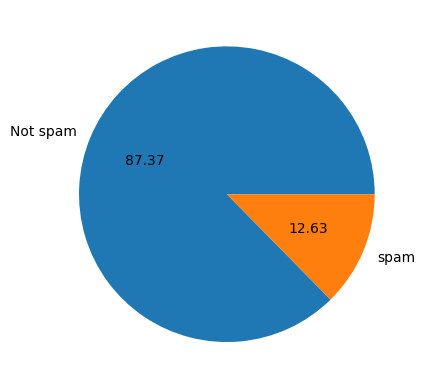

In [77]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels=["Not spam","spam"],autopct="%.2f")
plt.show()

In [78]:
#   nltk
import nltk
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [79]:
df["characters_count"]=df["text"].apply(len)

<ipython-input-79-de7b4cd7e7c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["characters_count"]=df["text"].apply(len)


In [80]:
df["words_count"]=df["text"].apply(lambda y:len(nltk.word_tokenize(y)))

<ipython-input-80-ac380e228a90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["words_count"]=df["text"].apply(lambda y:len(nltk.word_tokenize(y)))


In [81]:
df["sentence_count"]=df["text"].apply(lambda y:len(nltk.sent_tokenize(y)))

<ipython-input-81-f233bc01752a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentence_count"]=df["text"].apply(lambda y:len(nltk.sent_tokenize(y)))


In [82]:
df.head(5)

,target,text,characters_count,words_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [83]:
# checking data for ham and spam
df[df["target"]==0][["characters_count","words_count","sentence_count"]].describe()

,characters_count,words_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [84]:
# checking data for ham and spam
df[df["target"]==1][["characters_count","words_count","sentence_count"]].describe()

,characters_count,words_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='characters_count', ylabel='Count'>

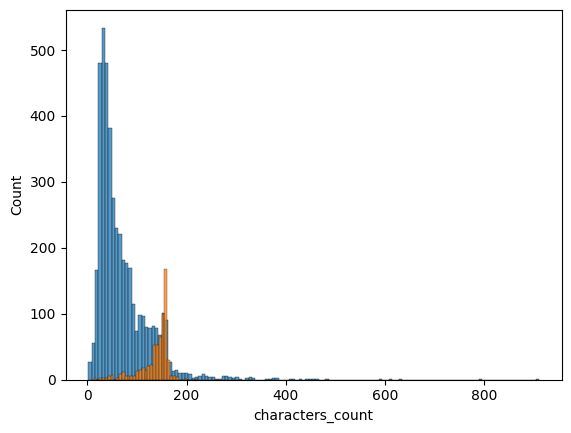

In [85]:
# Plotting values
import seaborn as sns
sns.histplot(df[df["target"]==0]["characters_count"])
sns.histplot(df[df["target"]==1]["characters_count"])


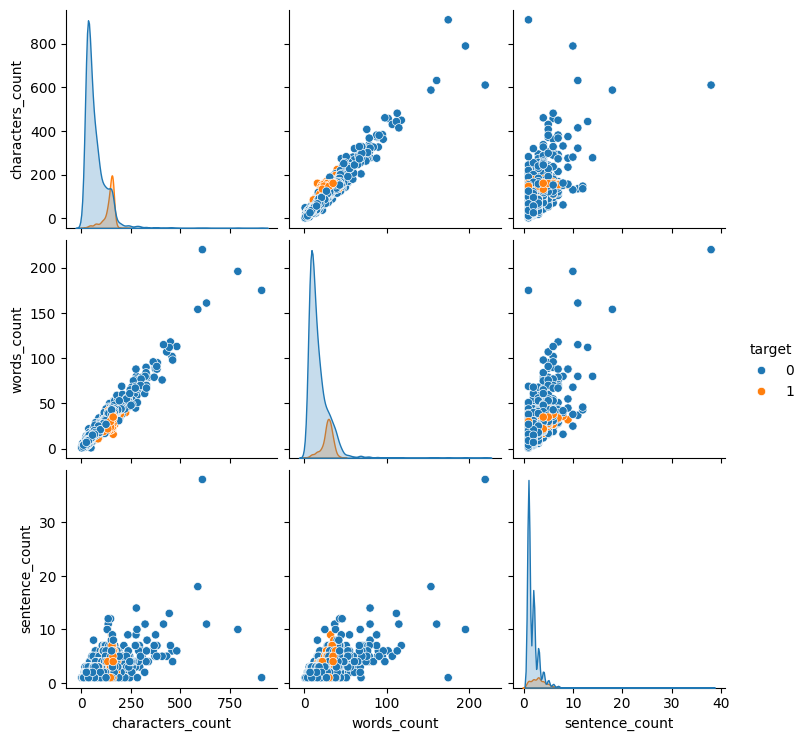

In [86]:
sns.pairplot(df,hue="target")

<Axes: >

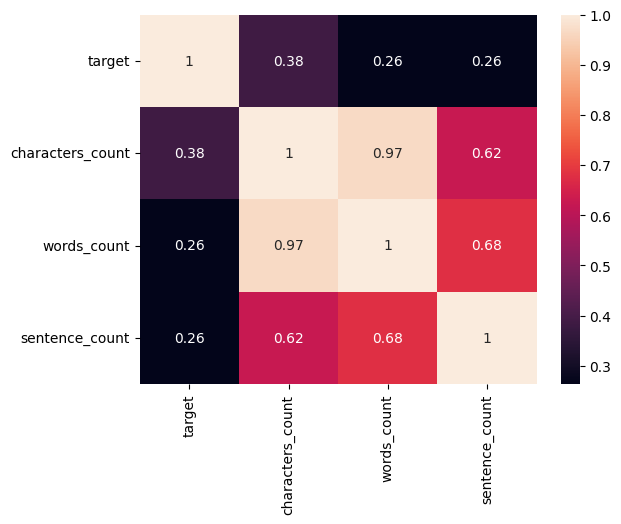

In [87]:
# Calculate the correlation matrix only for numeric columns
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True)

Data Preprocessing

In [104]:
from nltk.corpus import stopwords
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [106]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [115]:
def tranformation(text):
  # converting to lower case
  text=text.lower()
  # tokenizing the text
  text=nltk.word_tokenize(text)
  # Removing the special chars
  l=[]
  for i in text:
    if i.isalnum():
      l.append(i)
  # Removing the stop words and punvt
  text=l[:]
  l.clear()
  for i in text:
    if i not in string.punctuation and i not in stopwords.words("english"):
      l.append(i)

  # Stemming the text
  text=l[:]
  l.clear()
  for i in text:
    l.append(ps.stem(i))

  return " ".join(l)

In [118]:
# dummy eg
tranformation("Hello hi how 20&&&% are you §$%? i am good % !! Huziafa is good boy ,loving")

'hello hi 20 good huziafa good boy love'

In [119]:
# Applying above function to text col
df["transformed_text"]=df["text"].apply(tranformation)

<ipython-input-119-f0196aaca28e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_text"]=df["text"].apply(tranformation)


In [120]:
df.head()

,target,text,characters_count,words_count,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [121]:
# word cloud
from wordcloud import WordCloud

In [122]:
wc=WordCloud(width=600,height=600,min_font_size=10,background_color="white")

In [127]:
spam=wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

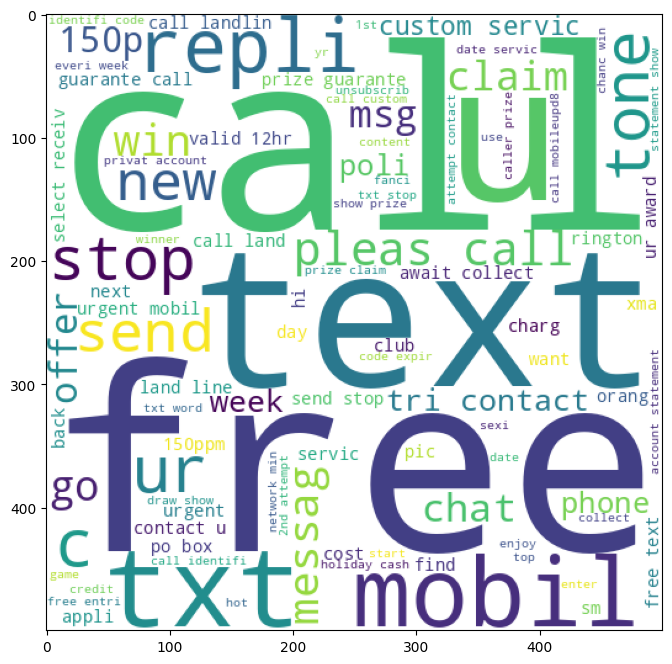

In [129]:
plt.figure(figsize=(16,8))
plt.imshow(spam)

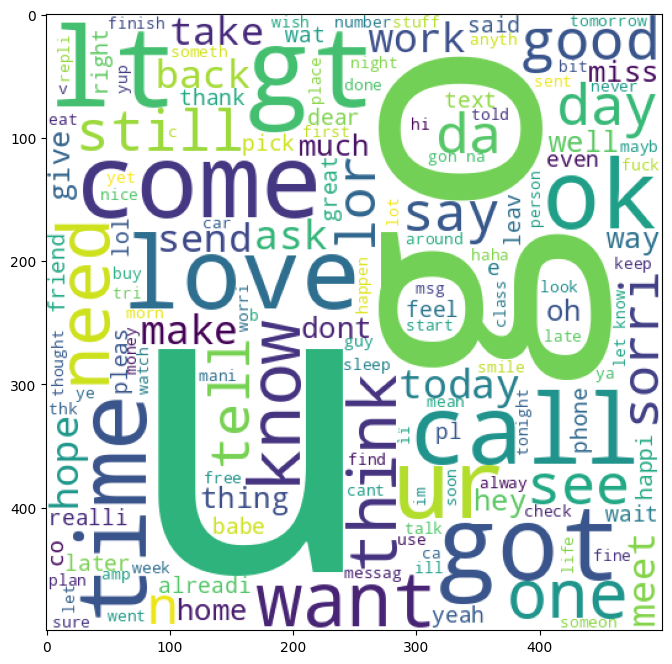

In [131]:
# ham wordcloud
ham=wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))
plt.figure(figsize=(16,8))
plt.imshow(ham)